In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from src import plotter

# Data Manipulation
import pandas as pd
# Calculations and Numerical Operations
import numpy as np
# Data Visualization
import plotly
from plotly import tools
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import make_subplots

#Geographic Data Visualization
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape
import matplotlib.pyplot as plt


import scipy.stats as stats
import pyspark as ps
import pyspark.sql.functions as F


In [44]:
# Cell for helper functions
crime_2003 = pd.read_csv('data/2003.csv')
crime_2004 = pd.read_csv('data/2004.csv')
crime_2005 = pd.read_csv('data/2005.csv')
crime_2006 = pd.read_csv('data/2006.csv')
crime_2007 = pd.read_csv('data/2007.csv')
crime_2008 = pd.read_csv('data/2008.csv')
crime_2009 = pd.read_csv('data/2009.csv')
crime_2010 = pd.read_csv('data/2010.csv')
crime_2011 = pd.read_csv('data/2011.csv')
crime_2012 = pd.read_csv('data/2012.csv')
crime_2013 = pd.read_csv('data/2013.csv')
crime_2014 = pd.read_csv('data/2014.csv')
crime_2015 = pd.read_csv('data/2015.csv')
crime_2016 = pd.read_csv('data/2016.csv')
crime_2017 = pd.read_csv('data/2017.csv')

In [45]:
crime_years = [crime_2003, crime_2004, crime_2005, crime_2006, crime_2007, crime_2008, 
               crime_2009, crime_2010, crime_2011, crime_2012, crime_2013, crime_2014, 
               crime_2015, crime_2016, crime_2017]

years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016', '2017']

In [ ]:
# #array, lat, long, mag = binning(crime_2003)
for year, data in zip(years, crime_years):
    plotter.plot_scatter(data, year)


![SegmentLocal](crime.gif "segment")

In [38]:
lat_series = pd.Series(lat)
long_series = pd.Series(long)
mag_series = pd.Series(mag)
crime_map = pd.DataFrame({'Lat': lat_series, 'Long': long_series, 'Count': mag_series})
crime_map.replace(to_replace=0.0, value=np.nan, inplace=True)

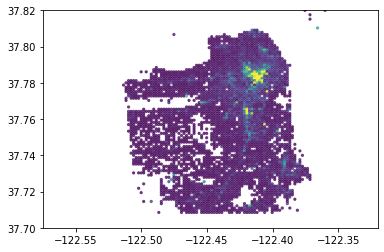

In [43]:
fig, ax = plt.subplots()
ax.scatter(crime_map['Long'], crime_map['Lat'], c=crime_map['Count'], vmin=0, vmax=200, alpha=.7, s=5)
ax.set_xlim(-122.575, -122.32)
ax.set_ylim(37.7, 37.82)
plt.savefig('2003.png', dpi=350)



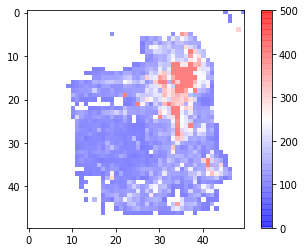

In [129]:
from matplotlib.colors import LogNorm
np.place(crime_array, crime_array == np.nan, 0)
img = plt.imread('pd_district.png')

fig, ax = plt.subplots()
#ax.imshow(img)
im = ax.imshow(crime_array, vmin = 0, vmax=500, cmap='bwr', alpha=0.5, interpolation='none')
fig.colorbar(im, ax=ax)
plt.show()
  


(-122.6, -122.3)

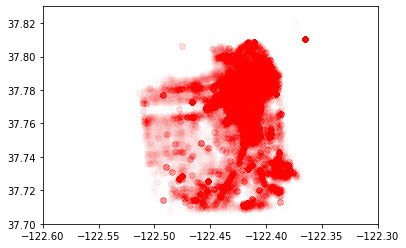

In [198]:
crime_2003 = pd.read_csv('data/2003.csv')
plt.plot(crime_2003['X'], crime_2003['Y'], 'ro',alpha=0.002)
plt.ylim(37.7,37.83)
plt.xlim(-122.6, -122.3)


In [40]:
import plotly.express as px
fig = px.density_mapbox(df, lat=crime_2003, lon=crime_2003['Y'], z='Magnitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

0         37.789882
1         37.785207
2         37.771302
3         37.775898
4         37.732115
5         37.792316
6         37.765225
7         37.784301
8         37.784658
9         37.794491
10        37.783311
11        37.765249
12        37.787353
13        37.774506
14        37.715393
15        37.753004
16        37.788029
17        37.782231
18        37.728528
19        37.757173
20        37.785941
21        37.787643
22        37.775421
23        37.710700
24        37.737157
25        37.784658
26        37.743748
27        37.761024
28        37.806209
29        37.772829
            ...    
149146    37.787402
149147    37.780599
149148    37.750265
149149    37.764284
149150    37.751557
149151    37.783510
149152    37.764911
149153    37.769769
149154    37.729069
149155    37.749140
149156    37.742121
149157    37.716189
149158    37.775421
149159    37.773038
149160    37.775833
149161    37.773244
149162    37.739682
149163    37.796210
149164    37.713643


In [16]:
array, lat, long, mag = plotter.binning(crime_2003)


In [34]:
subset = crime_2003.iloc[:20000, :]
array, lat, long, mag = plotter.binning(subset)
print(len(lat), len(long), len(mag))

10000 10000 10000


(50000,)
(50000,)


(-122.6, -122.3)

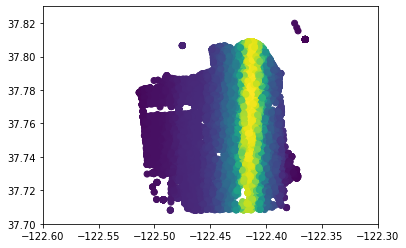

In [36]:
xy = np.vstack([subset['X'], subset['Y']])
z = stats.gaussian_kde(xy)(xy) # This defines the heat map aspect
print(z.shape)
print(subset['X'].shape)
plt.scatter(subset['X'], subset['Y'], c=z, alpha=.4)
plt.ylim(37.7,37.83)
plt.xlim(-122.6, -122.3)